In [ ]:
from Bio import SeqIO
for record in SeqIO.parse("pdb/6dwb.pdb", "pdb-seqres"):
    print("Record id %s, chain %s" % (record.id, record.annotations["chain"]))
    print(record.dbxrefs)
len(record.seq)

In [127]:
protein.id

'6dwb'

In [169]:
from Bio.PDB.PDBParser import PDBParser
from Bio.PDB.Chain import Chain
from Bio.PDB.internal_coords import *
from Bio.PDB.PICIO import write_PIC, read_PIC, read_PIC_seq
from Bio.PDB.ic_rebuild import write_PDB, IC_duplicate, structure_rebuild_test
from Bio.PDB.SCADIO import write_SCAD
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.PDB.PDBIO import PDBIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from Bio.PDB import PDBList

protein_ids = ['7B3Y', '8C9N', '7LYJ', '6YUN', '7QCT', '6XRZ', '8UYS', '8FU7']

phi_psi = pd.DataFrame(columns=['seq','phi', 'psi', 'chain', 'pos_in_chain', 'protein_id'])

for protein_id in protein_ids:
    parser = PDBParser()

    filename = f"pdb/{protein_id}.pdb"
    filename_ent = f"pdb/pdb{str(protein_id).lower()}.ent"
    if Path(filename).is_file():
        protein = parser.get_structure(protein_id, filename)
    elif Path(filename_ent).is_file():
        protein = parser.get_structure(protein_id, filename_ent)
    else:
        print(f"Downloading {protein_id}")
        pdbl = PDBList()
        filename = pdbl.retrieve_pdb_file(protein_id, pdir='pdb', file_format='pdb', obsolete=False)
        if Path(filename).is_file():
            protein = parser.get_structure(protein_id, filename)

    for chain in list(protein.get_chains()):
        chain = protein[0][chain.id]

        chain.atom_to_internal_coordinates(verbose=True)
        resultDict = structure_rebuild_test(chain)
        if not resultDict['pass']:
            print(f"Failed {protein_id} {chain.id}")
            continue

        residues = list(chain.get_residues())
        for i in range(1,len(residues)-1):
            key = f'{residues[i-1].resname}, {residues[i].resname}, {residues[i+1].resname}'
            if not residues[i].internal_coord:
                psi,phi = np.nan, np.nan
            else:
                psi = residues[i].internal_coord.get_angle("psi")
                phi = residues[i].internal_coord.get_angle("phi")
            phi_psi.loc[len(phi_psi)] = [key, phi, psi, chain.id, residues[i].get_full_id()[3][1], protein.id]

chain B len 202 missing atom(s): [0_K_CB]
chain B len 202 missing atom(s): [1_M_CB]
Desired structure doesn't exist
Failed 7LYJ A


/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2447.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2652.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3421.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3435.
  warnings.warn(


Failed 6XRZ A
Failed 6XRZ A
Failed 6XRZ A
Failed 6XRZ A
Failed 6XRZ A
Failed 6XRZ A
Failed 6XRZ A
Failed 6XRZ A
Failed 6XRZ A
Failed 6XRZ A
Failed 8UYS A
Failed 8UYS A
Failed 8UYS A
Failed 8UYS A
Failed 8UYS A
Failed 8UYS A
Failed 8UYS A
Failed 8UYS A
Failed 8UYS A
Failed 8UYS A
Failed 8UYS A
Failed 8UYS A
Failed 8UYS A
Failed 8UYS A
Failed 8UYS A
Failed 8UYS A
Failed 8UYS A
Failed 8UYS A
Failed 8UYS A
Failed 8UYS A
Failed 8UYS A
Failed 8UYS A
Failed 8UYS A
Failed 8UYS A
Failed 8UYS A
Failed 8UYS A
Failed 8UYS A
Failed 8UYS A
Failed 8UYS A
Failed 8UYS A


/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 25910.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 26150.
  warnings.warn(
/home/mmazeem/.local/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 26390.
  warnings.warn(


chain break at ASN  81  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at SER  247  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at ALA  672  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at LYS  838  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at ASN  81  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at SER  247  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at ALA  672  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at LYS  838  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at ASN  81  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at SER  247  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at ALA  672  due to MaxPeptideBond (1.4 angstroms) exceeded
chain break at LYS  838  due to MaxPeptideBond (1.4 angstroms) exceeded


In [167]:
phi_psi[~phi_psi.isna().any(axis=1)]
# phi_psi.protein_id.unique()

,seq,phi,psi,chain,pos_in_chain,protein_id
0,"LYS, MET, GLU",-55.383822,-42.039538,B,1,7B3Y
1,"MET, GLU, GLU",-62.64434,-41.729978,B,2,7B3Y
2,"GLU, GLU, LEU",-73.039212,-30.098693,B,3,7B3Y
3,"GLU, LEU, PHE",-69.596234,-43.633734,B,4,7B3Y
4,"LEU, PHE, LYS",-58.284522,-46.478356,B,5,7B3Y
...,...,...,...,...,...,...
9041,"PRO, LEU, GLN",-79.000571,-32.606122,C,1125,8FU7
9042,"LEU, GLN, PRO",-49.917769,-56.220758,C,1126,8FU7
9043,"GLN, PRO, GLU",-64.452004,-15.837219,C,1127,8FU7
9044,"PRO, GLU, LEU",-81.12309,-28.522747,C,1128,8FU7


In [166]:
phi_psi.groupby('seq').count().sort_values('phi', ascending=False)

,phi,psi,chain,pos_in_chain,protein_id
seq,,,,,
"VAL, THR, GLN",11,11,11,11,11
"SER, ALA, LEU",11,11,11,11,11
"LEU, VAL, LYS",10,10,10,10,10
"SER, THR, GLU",9,9,9,9,9
"LEU, PRO, PHE",9,9,9,9,9
...,...,...,...,...,...
"THR, ALA, SER",0,3,3,3,3
"ASP, NAG, NAG",0,0,3,3,3
"C, A, C",0,0,92,92,92


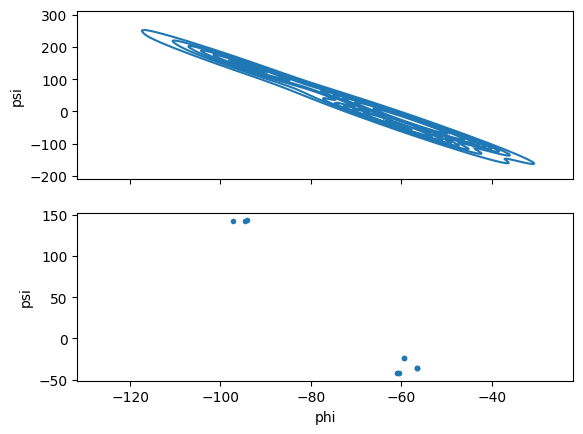

In [160]:
import seaborn as sns

key = 'SER, ALA, LEU'
x = phi_psi[phi_psi.seq == key].phi
y = phi_psi[phi_psi.seq == key].psi
df = phi_psi.loc[phi_psi.seq==key,['phi','psi']]

# plt.scatter(x, y, marker='.')
fig, axes = plt.subplots(2,1, sharex=True)
sns.kdeplot(
    data=df, 
    x='phi', 
    y='psi', 
    # cmap="Blues", 
    # fill=True, 
    # thresh=0.05,
    ax=axes[0]
)
axes[0].set_ylabel('psi')

axes[1].scatter(x, y, marker='.')
axes[1].set_xlabel('phi')
axes[1].set_ylabel('psi')

plt.show()